# NLP Zero to Hero with TensorFlow (Notes)

Source: https://www.youtube.com/playlist?list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S

March 2020

# 1. Tokenization - Getting your text ready

In [1]:
# imports
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

In [10]:
# instantiate tokenizer; num_words is max number of words to tokenize
# from data, selected by most frequently appearing (num_words)

# tokenizer can catch some things like taking the ! out


tokenizer = Tokenizer(num_words = 100)

# fit on data
tokenizer.fit_on_texts(sentences)

# create the word_index dictionary from tokenizer
word_index = tokenizer.word_index

print(word_index)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}


In [ ]:
# colab notebook: bit.ly/tfw-nlp1

# 2. Sequencing - Turning sentences into data

In [11]:
# turn sentences into lists of numbers of tokens
sequences = tokenizer.texts_to_sequences(sentences)

print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [12]:
# the tokenizer was fit on training data
# what happens when you ask the tokenizer to sequence test data
# that contains tokens it wasn't trained on (hasn't seen before?)

test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

# the tokenizer just leaves out the words that it doesn't know
# this results in sequences that are of different length than their sentences

[[4, 2, 1, 3], [1, 3, 1]]


In [14]:
# to get sequences that are the same length as their sentences
# even when the tokenizer doesn't recognize some words,
# pass the "out of vocabulary" ("<OOV>") token (or another token
# not expected to be in the corpus) to the tokenizer upon instantiation

tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

word_index = tokenizer.word_index
print(word_index)

# this keeps sentences and sequences the same length as each other

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]
{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


In [16]:
# but how does a deep learning model handle sentences (sequences)
# of different lengths?
# advanced answer: ragged tensor (sp?)
# this video answer: padding

# 0 is a pad (it will not be assigned to a token)

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded = pad_sequences(sequences)
print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [ ]:
# control if the pads are in front or back with the
# 'padding' parameter to 'post' or 'pre'
# i.e. pad_sequences(sequences, padding = 'post')

# the padder pads all sentences to be the same length as the
# longest sentence by default
# control the max length of the sequences with the 
# 'maxlen' parameter, i.e. pad_sequences(sequences, max_len = 5)

# if sentences are longer than the specified maxlen, then you
# can control if the front or the back of the sentence gets
# truncated with the 'truncating' parameter as 'pre' or 'post', i.e.
# pad_sequences(sequences, truncating = 'post', maxlen = 5)

# colab notebook: bit.ly/tfw-nlp2

# 3. Training a model to recognize sentiment in text

In [ ]:
# goal: build a classifier to recognize in text

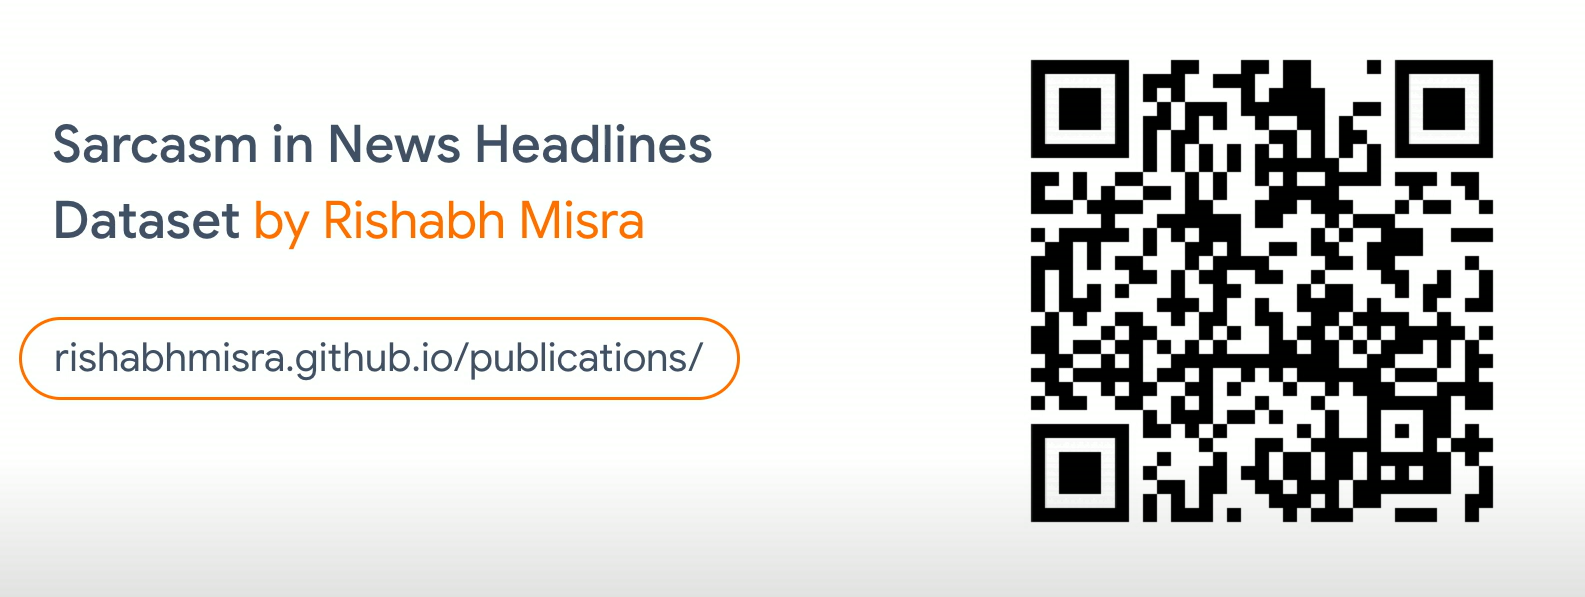

In [ ]:
# is_sarcastic: 1 if sarcastic otherwise 0
# headline: the headline of the news article
# article_link: link to the original news article; useful in
# collecting supplementary data (not used in this lesson)

In [17]:
# data is stored in json format, so need to convert to python

json format:
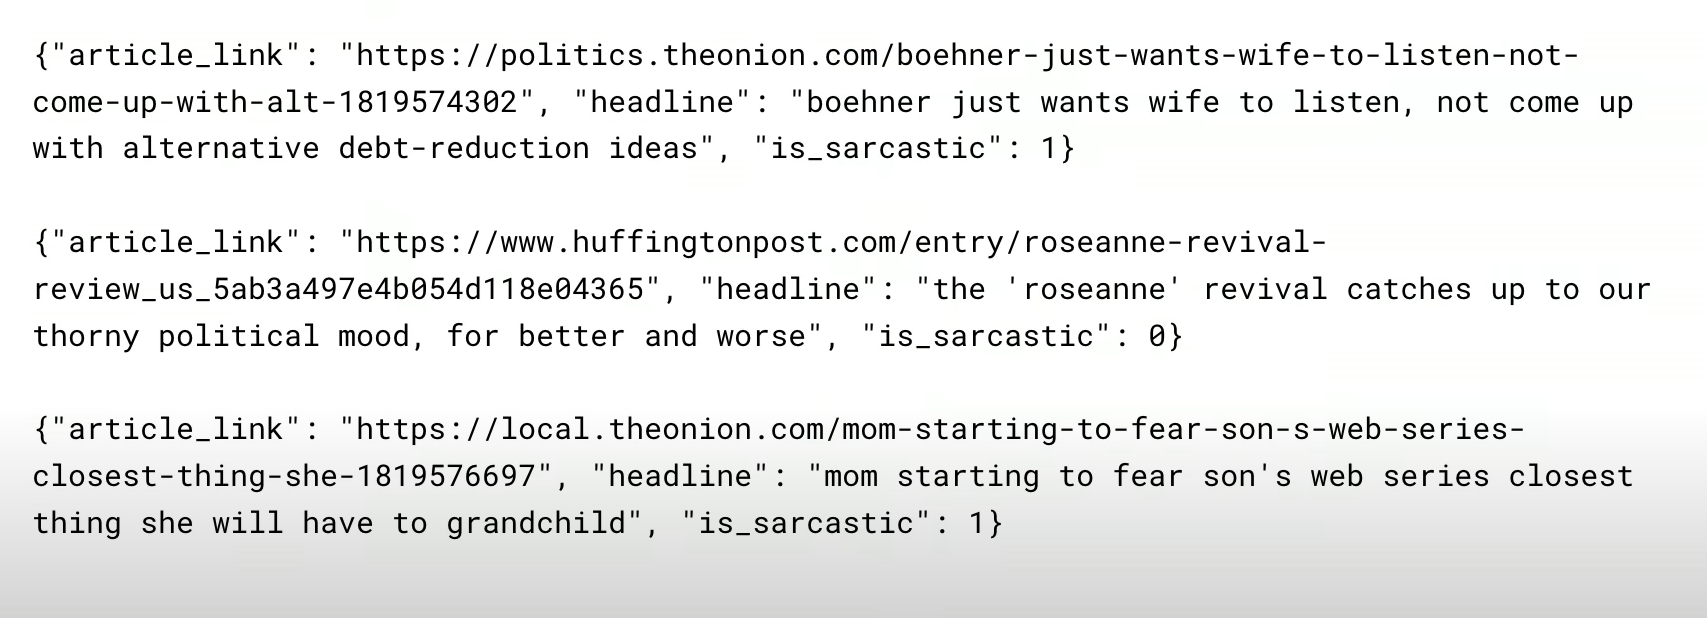

python format:
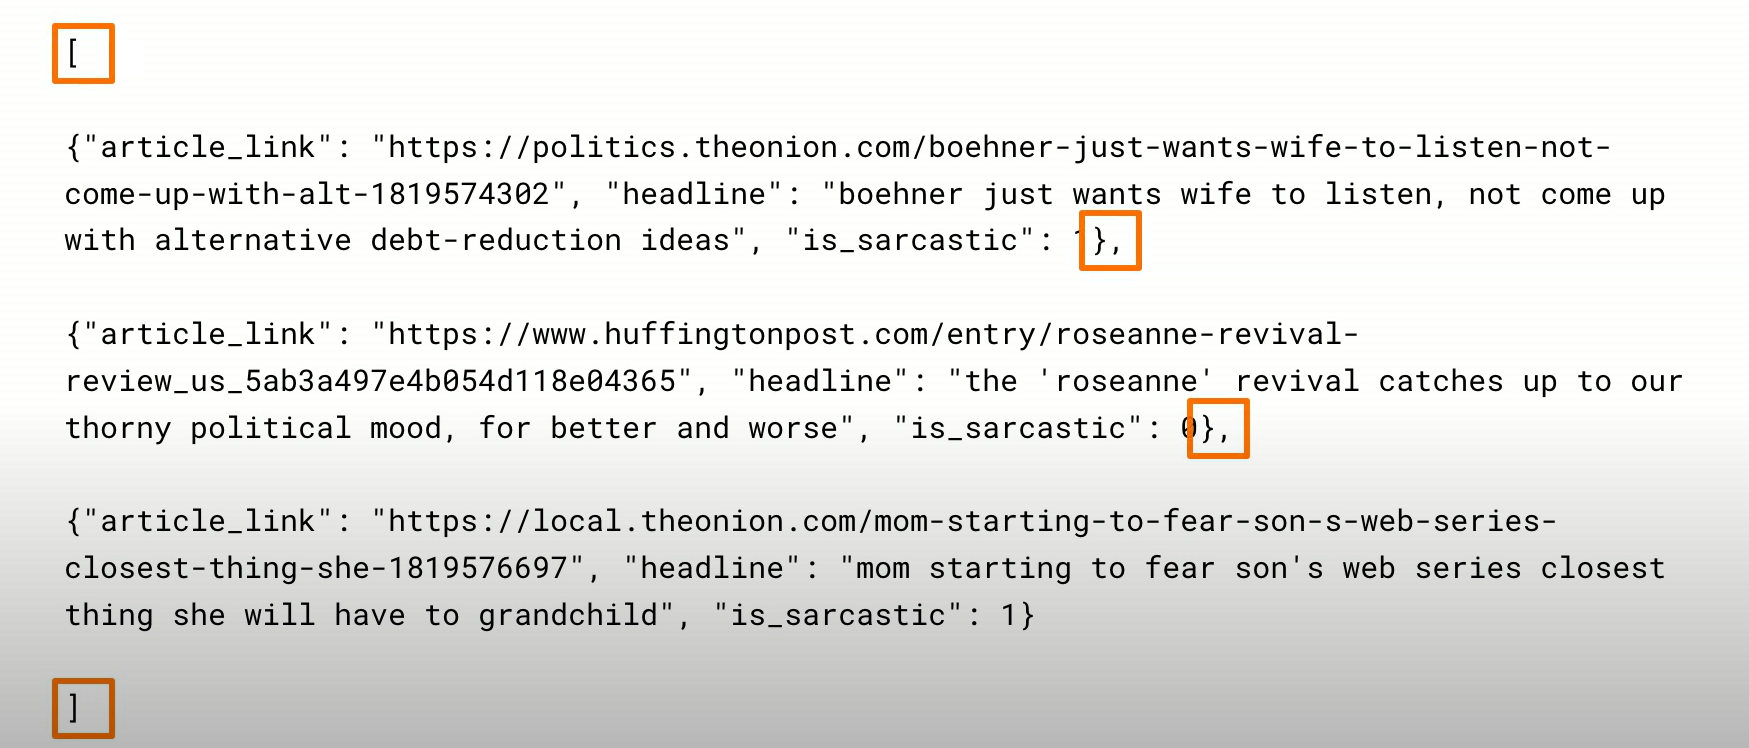

In [ ]:
# # from colab notebook:
# vocab_size = 10000
# embedding_dim = 16
# max_length = 100
# trunc_type='post'
# padding_type='post'
# oov_tok = "<OOV>"
# training_size = 20000

In [21]:
# import json
# commented out because data isn't available anymore

# with open("sarcasm.json", 'r') as f:
#     datastore = json.load(f)
    
# sentences = []
# labels = []
# urls = []

# for item in datastore:
#     sentences.append(item['headline'])
#     labels.append(item['is_sarcastic'])
#     urls.append(item['article_link'])

In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer = Tokenizer(oov_token = "<OOV>")
# tokenizer.fit_on_texts(sentences)
# word_index = tokenizer.word_index

# sequences = tokenizer.texts_to_sequences(sentences)
# padded = pad_sequences(sequences)

# # inspect
# print(padded[0])
# print(padded.shape)

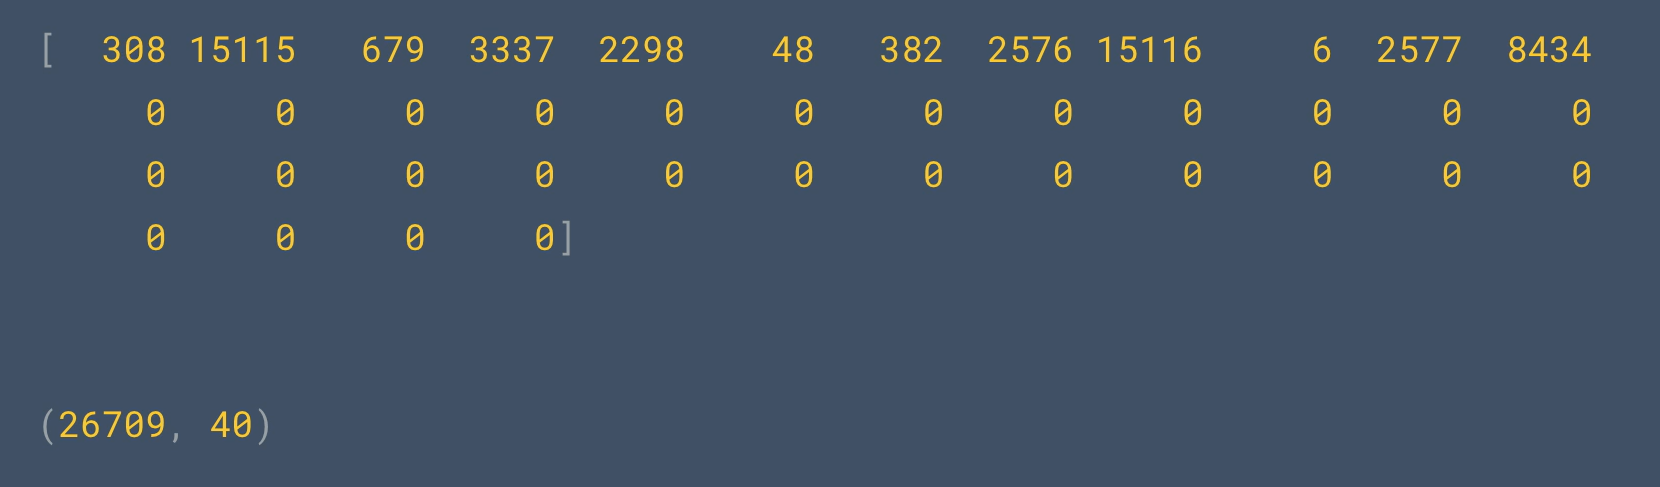

In [ ]:
# # need to train/text split
# training_sentences = sentences[0:training_size]
# testing_sentences = sentences[training_size:]
# training_labels = labels[0:training_size]
# testing_labels = labels[training_size:]

In [ ]:
# # rewrite tokenizer so that it only gets fit on training data
# tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
# tokenizer.fit_on_texts(training_sentences)

# word_index = tokenizer.word_index

# training_sequences = tokenizer.texts_to_sequences(training_sentences)
# training_padded = pad_sequences(training_sequences, 
#                                 maxlen = max_length, 
#                                 padding = padding_type, 
#                                 truncating = trunc_type)

# testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
# testing_padded = pad_sequences(testing_sequences, 
#                                 maxlen = max_length, 
#                                 padding = padding_type, 
#                                 truncating = trunc_type)

In [22]:
# # embedding: when the model looks up the vectors of all words in the
# # sequence and sums them up, the resulting vector can give an idea of
# # the sentiment of the sequence

# model = tf.keras.Sequential([
# 
#     # direction of vector of each word will be learned epoch by epoch
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),

#     # adds up vectors in each sequence
#     tf.keras.layers.GlobalAveragePooling1D(),

#     tf.keras.layers.Dense(24, activation = 'relu'),

#     tf.keras.layers.Dense(1, activation = 'sigmoid')
# ])

# model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# num_epochs = 30

# history = model.fit(training_padded, training_labels, epochs = num_epochs,
#                     validation_data = (testing_padded, testing_labels), verbose = 2)

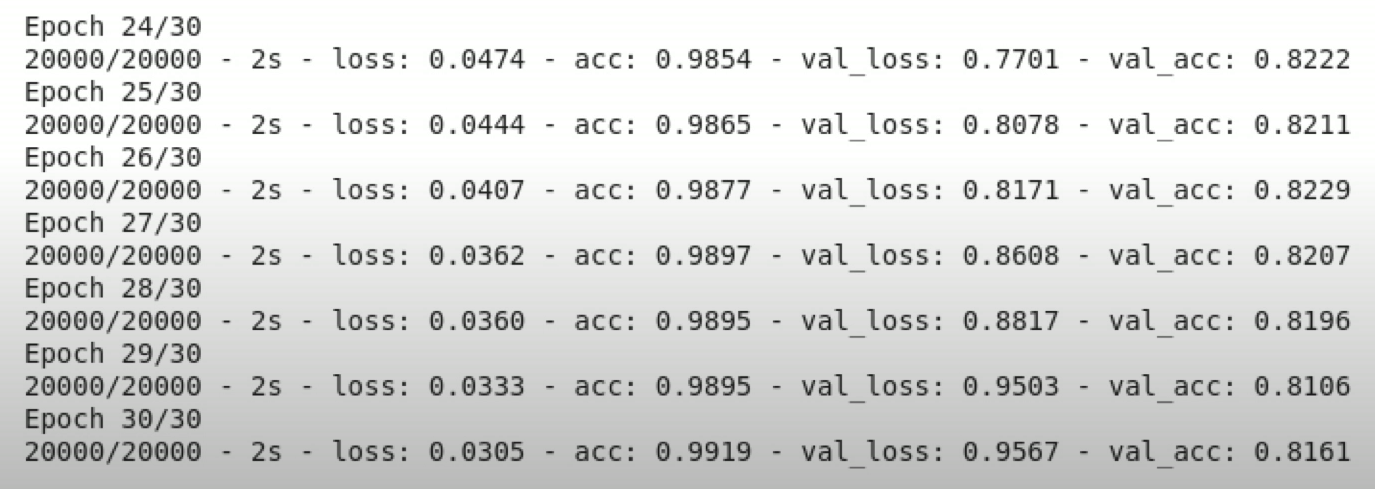

In [ ]:
# # create new data to classify
# sentence = [
#     "granny starting to fear spiders in the garden might be real",
#     "the weather today is bright and sunny"
# ]

# sequences = tokenizer.texts_to_sequences(sentence)

# padded = pad_sequences(sequences,
#                        maxlen = max_length,
#                        padding = padding_type,
#                        truncating = trunc_type)

# print(model.predict(padded))

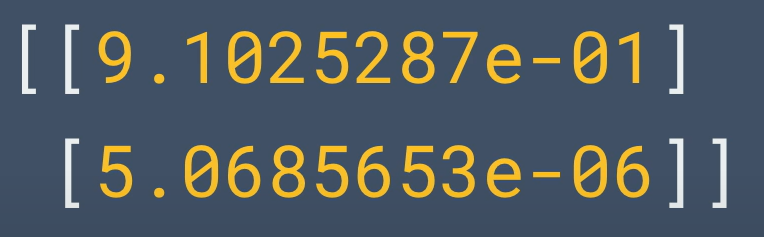

In [ ]:
# colab notebook: bit.ly/tfw-sarcembed

# 4. Machine Learning with Recurrent Neural Networks

Goal of parts 4-6: get an AI to generate text to write poetry

Important concept: recurrent neural networks
    - takes into account the word order
    - previous model (in part 3) separated words and added their individual vectors up to get a sarcasm probability